# **Kelompok** (Studi Kasus: Smart Fire Sprinkle)
1. 5210411106 - Ahamad Halim Faizal Zidan
2. 5210411135 - I Gede Widiantara
3. 5210411137 - Kristian Gunawan
4. 5210411147 - Muhammad Aufa Zaydan Azfar

# **Import Modul**

In [113]:
import pandas as pd
import numpy as np
import skfuzzy as skf
from skfuzzy import control as ctrl

# **Mendefinisikan Variable, Rule, dan Keanggotaan**

**Initialize Variable**

In [114]:
temperature = ctrl.Antecedent(np.arange(20, 81, 1), 'temperature')
smoke = ctrl.Antecedent(np.arange(0, 1001, 1), 'smoke')
fire = ctrl.Antecedent(np.arange(0, 1001, 1), 'fire')
pump_speed = ctrl.Consequent(np.arange(0, 241, 1), 'pump_speed')

**Define Temperature**

c:\Users\Asus Vivobook\anaconda3\envs\fuzzy-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


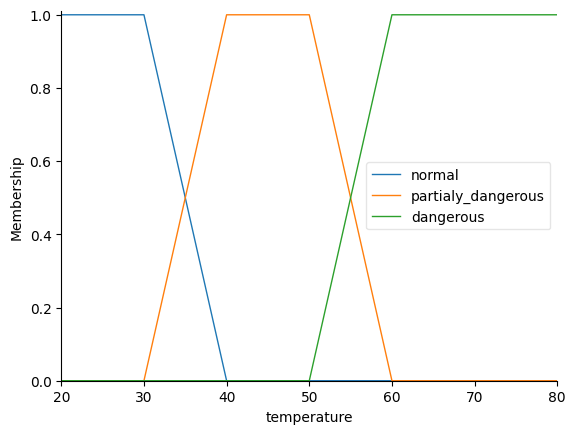

In [115]:
temperature['normal'] = skf.trapmf(temperature.universe, [20, 20, 30, 40])
temperature['partialy_dangerous'] = skf.trapmf(temperature.universe, [30, 40, 50, 60])
temperature['dangerous'] = skf.trapmf(temperature.universe, [50, 60, 80, 80])

temperature.view()

**Define Smoke**

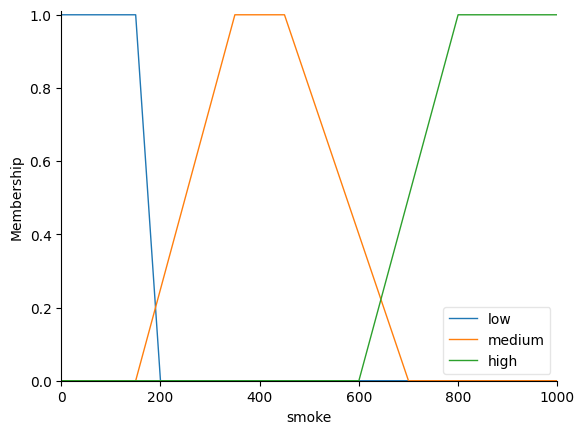

In [116]:
smoke['low'] = skf.trapmf(smoke.universe, [0, 0, 150, 200])
smoke['medium'] = skf.trapmf(smoke.universe, [150, 350, 450, 700])
smoke['high'] = skf.trapmf(smoke.universe, [600, 800, 1000, 1000])

smoke.view()

**Define Fire**

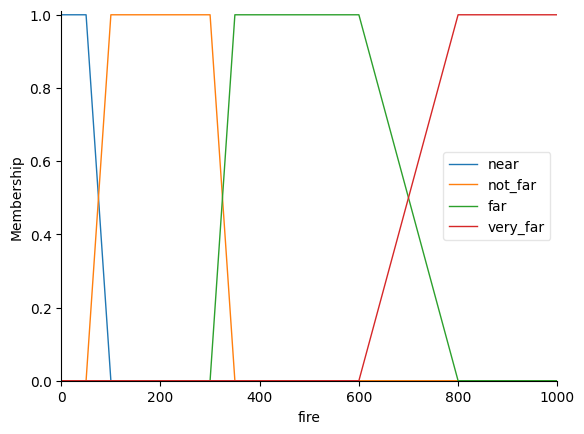

In [117]:
fire['near'] = skf.trapmf(fire.universe, [0, 0, 50, 100])
fire['not_far'] = skf.trapmf(fire.universe, [50, 100, 300, 350])
fire['far'] = skf.trapmf(fire.universe, [300, 350, 600,800])
fire['very_far'] = skf.trapmf(fire.universe, [600, 800, 1000, 1000])

fire.view()

**Define Pump Speed**

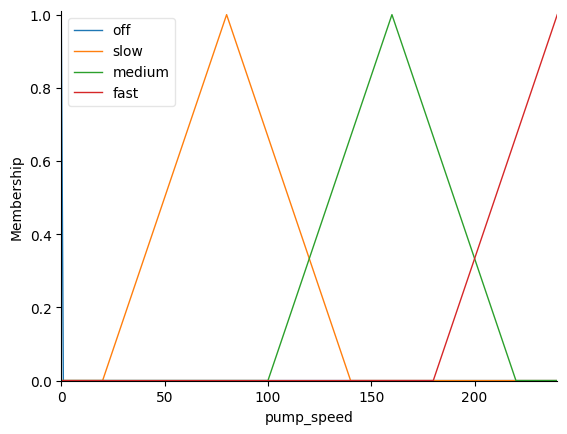

In [118]:
pump_speed['off'] = skf.trimf(pump_speed.universe, [0, 0, 0])
pump_speed['slow'] = skf.trimf(pump_speed.universe, [20, 80, 140])
pump_speed['medium'] = skf.trimf(pump_speed.universe, [100, 160, 220])
pump_speed['fast'] = skf.trapmf(pump_speed.universe, [180, 240, 240, 240])

pump_speed.view()

**Define Rules**

In [119]:
rules = [
    # temperature dangerous
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['low'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['very_far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['far'], pump_speed['medium']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['not_far'], pump_speed['fast']),
    ctrl.Rule(temperature['dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature partialy dangerous
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['medium'] & fire['near'], pump_speed['fast']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['partialy_dangerous'] & smoke['high'] & fire['near'], pump_speed['fast']),

    # temperature medium
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['low'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['very_far'], pump_speed['off']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['not_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['medium'] & fire['near'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['very_far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['far'], pump_speed['slow']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['not_far'], pump_speed['medium']),
    ctrl.Rule(temperature['normal'] & smoke['high'] & fire['near'], pump_speed['medium'])
]

**Membership Value**

In [120]:
def inferences(storage=[], temp=0, smk=0, fr=0):
    temperature_inf = storage.copy()
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['partialy_dangerous'].mf, temp))
    temperature_inf.append(skf.interp_membership(temperature.universe, temperature['normal'].mf, temp))

    smoke_inf = storage.copy()
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['low'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['medium'].mf, smk))
    smoke_inf.append(skf.interp_membership(smoke.universe, smoke['high'].mf, smk))

    fire_inf = storage.copy()
    fire_inf.append(skf.interp_membership(fire.universe, fire['very_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['not_far'].mf, fr))
    fire_inf.append(skf.interp_membership(fire.universe, fire['near'].mf, fr))

    return [temperature_inf, smoke_inf, fire_inf]

**Define Input**

In [121]:
input_temperature = 75
input_fire = 650
input_smoke = 320

# **Metode Tsukamoto**

**Find z value**

In [122]:
def z_slow_tsukamoto(a_pred):
    z1 = (a_pred * (80-20)) + 20
    z2 = 140 - (a_pred*(140-80))
    return z1, z2

def z_medium_tsukamoto(a_pred):
    z1 = (a_pred * (160-100)) + 100
    z2 = 220 - (a_pred*(220-160))
    return z1, z2

def z_fast_tsukamoto(a_pred):
    z1 = (a_pred * (240-180)) + 180
    return z1

**Tsukamoto Method**

In [123]:
from itertools import product

def tsukamoto(input_temperature, input_smoke, input_fire):
    inference = inferences(temp=input_temperature, smk=input_smoke, fr=input_fire)

    rule_inferences = [list(combination) for combination in product(*inference)]

    a_val = []
    z_val = []
    for idx, ri in enumerate(rule_inferences):
        a_pred = min(ri)
        if a_pred > 0:
            if 'pump_speed[off]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z_val.append(0)
            if 'pump_speed[slow]' in str(rules[idx].consequent):
                a_val.append(a_pred*2)
                z1, z2 = z_slow_tsukamoto(a_pred)
                z_val.append(z1*a_pred)
                z_val.append(z2*a_pred)
            if 'pump_speed[medium]' in str(rules[idx].consequent):
                a_val.append(a_pred*2)
                z1, z2 = z_medium_tsukamoto(a_pred)
                z_val.append(z1*a_pred)
                z_val.append(z2*a_pred)
            if 'pump_speed[fast]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_fast_tsukamoto(a_pred)
                z_val.append(z1*a_pred)

    output_action = sum(z_val)/sum(a_val)
    return output_action

output_action =  tsukamoto(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 140.0 m/s


**Visualization**

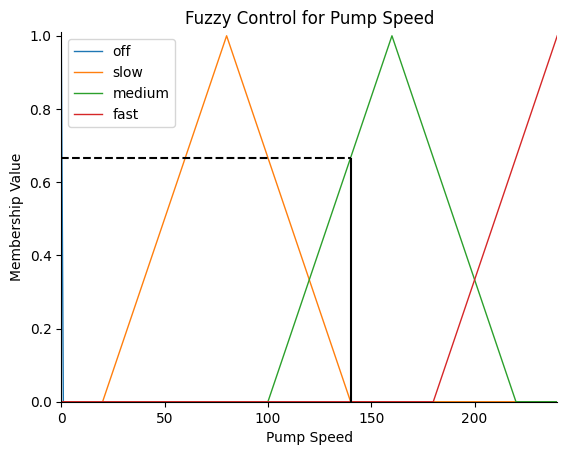

In [124]:
import matplotlib.pyplot as plt

def visualize(output_action):
    pump_speed.view()

    m_value = skf.interp_membership(pump_speed.universe, pump_speed['medium'].mf, output_action)
    m_value1 = skf.interp_membership(pump_speed.universe, pump_speed['slow'].mf, output_action)
    m_value2 = skf.interp_membership(pump_speed.universe, pump_speed['fast'].mf, output_action)
    m = max(m_value, m_value1, m_value2)
    plt.vlines(output_action, 0, m, colors='black')
    plt.hlines(m, 0, output_action, colors='black', linestyles='dashed')

    plt.xlabel("Pump Speed")
    plt.ylabel("Membership Value")
    plt.title("Fuzzy Control for Pump Speed")
    plt.legend()

    plt.show()

visualize(output_action)

# **Metode Mamdani**

**Mamdani Method**

In [125]:
def mamdani(input_temperature, input_fire, input_smoke):
    control_system = ctrl.ControlSystem(rules)

    # Simulate the system
    simulation = ctrl.ControlSystemSimulation(control_system)
    simulation.input['temperature'] = input_temperature
    simulation.input['smoke'] = input_smoke
    simulation.input['fire'] = input_fire

    simulation.compute()

    output_action = simulation.output['pump_speed']
    return output_action, simulation

output_action, simulation =  mamdani(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 135.73770491803276 m/s


**Visualization**

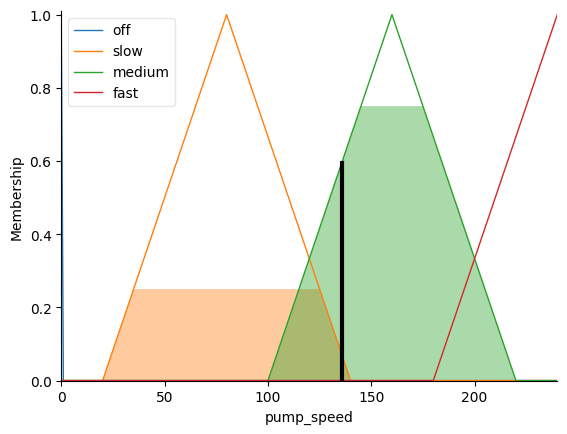

In [126]:
pump_speed.view(sim=simulation)

# **Metode Sugeno**

**Find z value**

In [127]:
def z_slow(fire, smoke):
    z1 = abs(fire - smoke - 250)
    return z1

def z_medium(a_pred, temperature):
    z1 = ((220-100)/2)*a_pred + temperature
    return z1

def z_fast():
    z1 = 230
    return z1

**Sugeno Method**

In [128]:
from itertools import product

def sugeno(input_temperature, input_smoke, input_fire):
    inference = inferences(temp=input_temperature, smk=input_smoke, fr=input_fire)

    rule_inferences = [list(combination) for combination in product(*inference)]

    a_val = []
    z_val = []
    for idx, ri in enumerate(rule_inferences):
        a_pred = min(ri)
        if a_pred > 0:
            if 'pump_speed[off]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z_val.append(0)
            if 'pump_speed[slow]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_slow(fire=input_fire, smoke=input_smoke)
                z_val.append(z1*a_pred)
            if 'pump_speed[medium]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_medium(a_pred=a_pred, temperature=input_temperature)
                z_val.append(z1*a_pred)
            if 'pump_speed[fast]' in str(rules[idx].consequent):
                a_val.append(a_pred)
                z1 = z_fast()
                z_val.append(z1*a_pred)

    output_action = sum(z_val)/sum(a_val)
    return output_action

output_action =  sugeno(input_temperature=input_temperature, input_smoke=input_smoke, input_fire=input_fire)
print(f'Water Pump Speed Output: {output_action} m/s')

Water Pump Speed Output: 110.0 m/s


**Visualization**

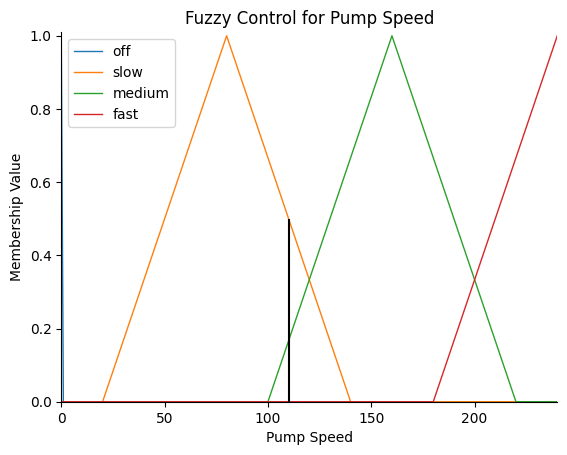

In [129]:
import matplotlib.pyplot as plt

def visualize(output_action):
    pump_speed.view()

    m_value = skf.interp_membership(pump_speed.universe, pump_speed['medium'].mf, output_action)
    m_value1 = skf.interp_membership(pump_speed.universe, pump_speed['slow'].mf, output_action)
    m_value2 = skf.interp_membership(pump_speed.universe, pump_speed['fast'].mf, output_action)
    m = max(m_value, m_value1, m_value2)
    plt.vlines(output_action, 0, m, colors='black')

    plt.xlabel("Pump Speed")
    plt.ylabel("Membership Value")
    plt.title("Fuzzy Control for Pump Speed")
    plt.legend()

    plt.show()

visualize(output_action)

# **Hasil dan Analisis** (10 studi kasus)

**Hasil Tsukamoto**

In [130]:
hasil_tsukamoto = pd.read_excel(r'D:/Code/py_code/Fuzzy-Logic/FIS/output-data.xlsx', sheet_name='tsukamoto')
hasil_tsukamoto

,Temperature,Smoke,Fire,Output
0,48.2,193,43,174.289899
1,40.0,300,900,0.000000
2,35.0,150,320,102.222222
3,65.0,450,50,240.000000
4,75.0,700,650,160.000000
5,35.0,50,950,0.000000
6,40.0,50,700,53.333333
7,65.0,100,400,160.000000
8,75.0,50,50,240.000000
9,35.0,750,50,176.666667


**Hasil Mamdani**

In [131]:
hasil_mamdani = pd.read_excel('D:/Code/py_code/Fuzzy-Logic/FIS/output-data.xlsx', sheet_name='mamdani')
hasil_mamdani

,Temperature,Smoke,Fire,Output
0,48.2,193,43,179.123668
1,40.0,300,900,0.350000
2,35.0,150,320,120.000000
3,65.0,450,50,220.000000
4,75.0,700,650,160.000000
5,35.0,50,950,0.388889
6,40.0,50,700,79.342057
7,65.0,100,400,160.000000
8,75.0,50,50,220.000000
9,35.0,750,50,176.575342


**Hasil Sugeno**

In [132]:
hasil_sugeno = pd.read_excel('D:/Code/py_code/Fuzzy-Logic//FIS/output-data.xlsx', sheet_name='sugeno')
hasil_sugeno

,Temperature,Smoke,Fire,Output
0,48.2,193,43,161.616901
1,40.0,300,900,0.000000
2,35.0,150,320,75.833333
3,65.0,450,50,230.000000
4,75.0,700,650,100.000000
5,35.0,50,950,0.000000
6,40.0,50,700,200.000000
7,65.0,100,400,125.000000
8,75.0,50,50,230.000000
9,35.0,750,50,147.500000


## **Perbandingan Ketiga Hasil**

In [133]:
hasil = pd.concat([hasil_tsukamoto['Output'], hasil_mamdani['Output'], hasil_sugeno['Output']], axis=1)
hasil.columns = ['Tsukamoto', 'Mamdani', 'Sugeno']
hasil

,Tsukamoto,Mamdani,Sugeno
0,174.289899,179.123668,161.616901
1,0.000000,0.350000,0.000000
2,102.222222,120.000000,75.833333
3,240.000000,220.000000,230.000000
4,160.000000,160.000000,100.000000
5,0.000000,0.388889,0.000000
6,53.333333,79.342057,200.000000
7,160.000000,160.000000,125.000000
8,240.000000,220.000000,230.000000
9,176.666667,176.575342,147.500000


## **Analisis Hasil & Kesimpulan**
1. Metode Tsukamoto:
    - Defuzzifikasi dilakukan dengan menghitung rata-rata tertimbang dari pusat massa setiap kurva fuzzy output.
    - Kelebihan metode ini adalah mudah dipahami dan diimplementasikan.
    - Pada experiment ini terlihat bahwa hasil dari metode **Tsukamoto** mendekati hasil dari metode **Mamdani** namun tidak seakurat dari metode **Mamdani**.

2. Metode Mamdani:
    - Defuzzifikasi dilakukan dengan menghitung centroid (titik pusat) dari area fuzzy output.
    - Kelebihan metode ini adalah lebih akurat dibandingkan metode Tsukamoto karena mempertimbangkan seluruh area kurva fuzzy output.
    - Hasil metode **Mamdani** lebih akurat dibuktikan dengan data index ke-2 dan ke-5. Pada metode **Tsukamoto** hasil hanya terdeteksi 0, namun pada metode **Mamdani** nilai 0 lebih spesifik lagi seperti 0.35.

3. Metode Sugeno:
    - Defuzzifikasi dilakukan dengan menggunakan fungsi linear yang didefinisikan untuk setiap aturan fuzzy.
    - Kelebihan metode ini adalah lebih fleksibel dan dapat digunakan untuk model yang lebih kompleks.
    - Kekurangan metode ini adalah membutuhkan pengetahuan tentang sistem yang dimodelkan untuk mendefinisikan fungsi linear. Penggunaan metode **Sugeno** memerlukan rule yang sesuai dengan inputan yang diberikan. Terlihat bahwa data pada index ke 8, hasil dari metode **Sugeno** sangat jauh dari hasil metode **Tsukamoto** dan **Mamdani**. Namun untuk hasil yang lainnya sudah cukup mendekati metode lainnya.

Dengan demikian, tergantung pada kompleksitas dan kebutuhan spesifik suatu sistem, pemilihan antara Tsukamoto, Mamdani, atau Sugeno perlu mempertimbangkan keseimbangan antara kemudahan implementasi, akurasi, dan fleksibilitas dalam menggambarkan hubungan antara variabel-variabel input dan output dalam konteks sistem fuzzy.